,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


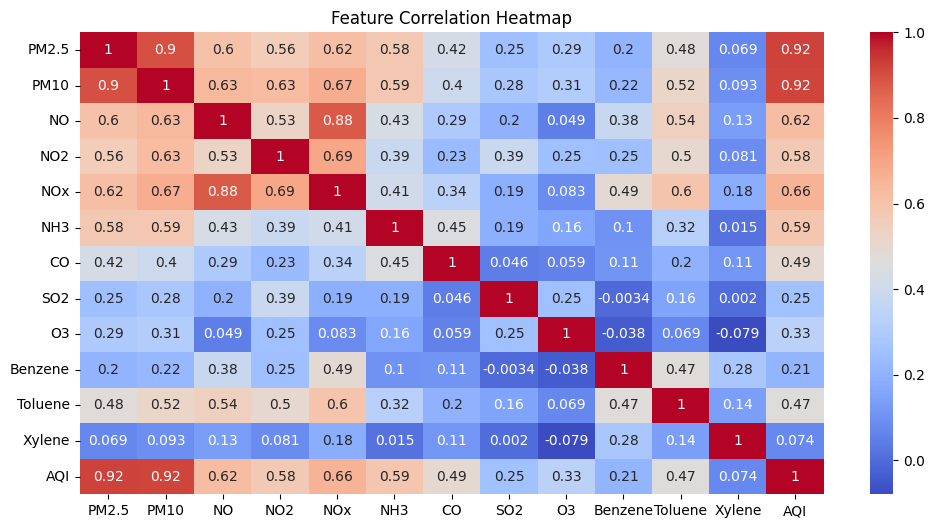

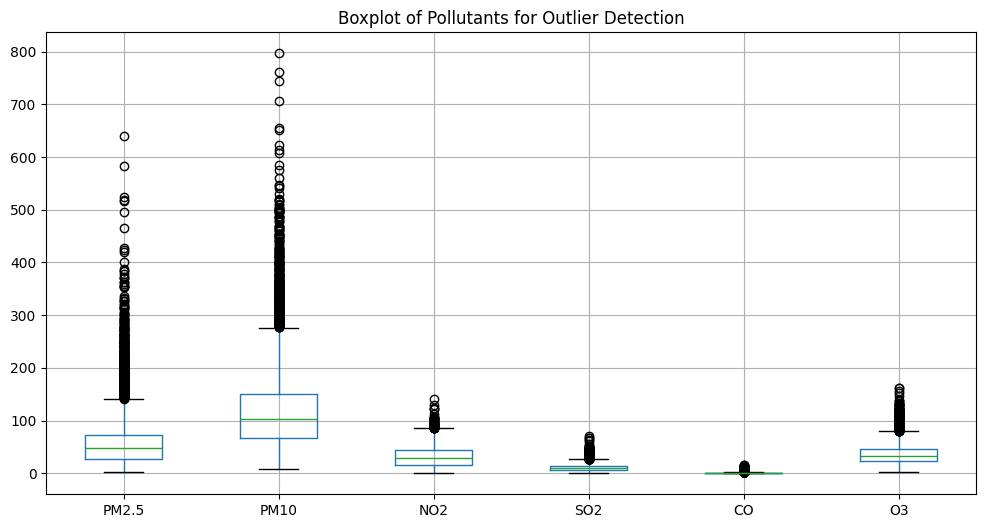

Data Preprocessing and EDA Completed Successfully!


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load Dataset (Replace 'your_dataset.csv' with actual file path)
df = pd.read_csv("/content/432c92d7855c48075139.csv")

# Display first few rows
display(df.head())

# Data Preprocessing
# Handling missing values
df.dropna(inplace=True)

# Selecting relevant features
features = ['PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'O3']  # Modify as needed
target = 'AQI'

# **--- Change 1: Select only numeric columns for correlation ---**
# Select only numeric features for correlation analysis
numeric_df = df.select_dtypes(include=np.number)


#Exploratory Data Analysis (EDA)
plt.figure(figsize=(12,6))
# **--- Change 2: Use numeric_df for correlation ---**
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

# Boxplots for detecting outliers
plt.figure(figsize=(12,6))
df[features].boxplot()
plt.title("Boxplot of Pollutants for Outlier Detection")
plt.show()

# Removing outliers using IQR method
Q1 = df[features].quantile(0.25)
Q3 = df[features].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df[features] < (Q1 - 1.5 * IQR)) | (df[features] > (Q3 + 1.5 * IQR))).any(axis=1)]

# Splitting dataset into train and test sets
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Data Preprocessing and EDA Completed Successfully!")